#### Import packages

In [ ]:
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 11 kB/s 


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re

from emot.emo_unicode import UNICODE_EMOJI # For emojis
#from emot.emo_unicode import EMOTICONS_EMO # For emoticons

In [ ]:
# mounting gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Method to retrive all csv's

In [ ]:
# merge all csv's from given path
def read_all_files(path = "/content/drive/MyDrive/SMBA_2022/Datasets/elonmusk_tweets/"):
  coun = 0
  df = pd.DataFrame()
  for i,d_names,f in os.walk(path):
    for dir in d_names:
      t_path  = os.path.join(i, dir)
      for root, j, f_names in os.walk(t_path):
        for f_name in f_names:
          if ".csv" in f_name:
            infile = os.path.join(t_path, f_name)
            t_df = pd.read_csv(infile, encoding = "utf-8")
            # print(t_df.head())
            df = pd.concat([df, t_df])
        coun += 1
    return df

#### Methods to remove emoji and other special characters

In [ ]:
def remove_emojis(text):
    regex_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return regex_pattern.sub(r'', text)

#### Method for converting emojis into words

In [ ]:
def convert_emojis_to_text(tweet):
    for emot in UNICODE_EMOJI:
        tweet = tweet.replace(emot, (UNICODE_EMOJI[emot].replace(",","").replace(":"," ").replace("_"," ")))
    return tweet

#### Method for cleaning all tweets

In [ ]:
def clean_tweet(df):
  # drop all rows with any NaN and NaT values
  df = df.dropna()

  # covert all values of year column into integer
  df["year"] = [int(year) for year in df.year]
  cleaned_tweet = [] 
  coun = 0 
  for i, tweet in df.iterrows():
    original_tweet = tweet.original_tweet
    
    # convert tweet into strings
    original_tweet = str(original_tweet)

    # convert emojis to text description
    original_tweet = convert_emojis_to_text(original_tweet)

    # remove newlines
    while "\n" in original_tweet:
      original_tweet = original_tweet.replace('\n',' ')
    
    # remove http://
    t_ls = [word for word in original_tweet.split() if "http:" not in word]
    original_tweet = " ".join(t_ls)

    # remove @
    t_ls = [word for word in original_tweet.split() if "@" not in word]
    original_tweet = " ".join(t_ls)
    
    # remove https://
    t_ls = [word for word in original_tweet.split() if "https:" not in word]
    original_tweet = " ".join(t_ls)

    # normalize all tweets
    original_tweet = original_tweet.lower()

    # reomve emoji and special characters
    original_tweet = remove_emojis(original_tweet)
    
    # append cleaned tweet into a list
    cleaned_tweet.append(original_tweet)
    
  df["cleaned_tweet"] = cleaned_tweet
  return df

#### Method for removing all duplicates

In [ ]:
def remove_duplicates(df):
  unique_tweets = df.cleaned_tweet.unique()
  unique_tweets_dict = {}
  for tweet in unique_tweets:
    unique_tweets_dict[tweet] = 0
    
  unique_indx = []
  coun = 0
  for i, row in df.iterrows():
    if unique_tweets_dict[row.cleaned_tweet] == 1:
      coun+=1
      continue
    else:
      unique_tweets_dict[row.cleaned_tweet] = 1
      unique_indx.append(coun)
      coun+=1
  new_df = df.iloc[unique_indx]
  return new_df

#### Method to remove null values or missing values

In [ ]:
def remove_missing_columns(df, year = 2021):
  for i in df.keys():
    df.dropna(subset=[i], inplace=True)

  return df 

#### Method for showing yearly distribution of tweets

In [ ]:
def draw_tweet_barPlot(x, y, title):
  plt.clf()
  plt.rcParams.update({'font.size': 12})
  fig = plt.figure(figsize = (8, 6))

  # creating the bar plot
  plt.bar(x, y, color ='grey', width = 0.8)
  
  plt.xlabel("Year")
  plt.ylabel("No. of tweets")
  plt.title(f"{title}")
  fig.savefig(f"{title}.png")
  plt.show();
  return

#### Method for retrive tweet with specific coin name

In [ ]:
def filter_with_coin(df, coin_name):
  coin_indx = []
  coun = 0
  raw_tweet_ls = []
  cleaned_tweet_ls = []
  year_ls = []
  month_ls = []
  day_ls = []
  time_ls = []
  tweet_id = []

  for i, row in df.iterrows():
    if coin_name in row.cleaned_tweet:
      tweet_id.append(row.tweet_id)
      raw_tweet_ls.append(row.original_tweet)
      cleaned_tweet_ls.append(row.cleaned_tweet)
      year_ls.append(row.year)
      month_ls.append(row.month)
      day_ls.append(row.day)
      time_ls.append(row.time)
      
  new_dict = {
      "tweet_id": tweet_id,
      "original_tweet": raw_tweet_ls,
      "cleaned_tweeet": cleaned_tweet_ls,
      "year": year_ls,
      "month": month_ls,
      "day": day_ls,
      "time": time_ls
  }
  new_df = pd.DataFrame(new_dict)
  return new_df

#### Doge coin analysis

In [ ]:
# infile = "/content/doge_coin_raw_dataset.csv"
# df = pd.read_csv(infile, encoding = "utf-8")

In [ ]:
# read all data files of elon musk tweets 
df = read_all_files(path = "/content/drive/MyDrive/SMBA_2022/Datasets/doge_tweets/overall_doge_tweet_2021")

In [ ]:
df.head()

AttributeError: ignored

In [ ]:
df = df.drop(columns=["Unnamed: 0"])

In [ ]:
df.year.unique()

array([2021, '2021', nan, 'Twitter for iPhone', 'Twitter for Android',
       'Twitter'], dtype=object)

In [ ]:
df[df.year == "Twitter"]

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source
214,2021.0,2.0,28,20:00:10,Twitter,NaN,NaN,NaN,NaN
450,2021.0,2.0,28,19:04:36,Twitter,NaN,NaN,NaN,NaN
173,2021.0,3.0,01,21:00:07,Twitter,NaN,NaN,NaN,NaN
649,2021.0,3.0,01,20:00:03,Twitter,NaN,NaN,NaN,NaN
338,2021.0,3.0,01,19:00:11,Twitter,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
462,2021.0,3.0,07,07:30:00,Twitter,NaN,NaN,NaN,NaN
548,2021.0,3.0,07,07:00:10,Twitter,NaN,NaN,NaN,NaN
639,2021.0,3.0,07,06:30:07,Twitter,NaN,NaN,NaN,NaN
717,2021.0,3.0,07,06:00:09,Twitter,NaN,NaN,NaN,NaN


In [ ]:
df[df.year == "Twitter"].count()

tweet_id          102
user_id           102
user_name         102
original_tweet    102
year              102
month               0
day                 0
time                0
source              0
dtype: int64

In [ ]:
df[df.year == "2021"].count()

tweet_id          18597
user_id           18597
user_name         18597
original_tweet    18597
year              18597
month             18597
day               18597
time              18597
source            18597
dtype: int64

In [ ]:
df[pd.isnull(df.year)]

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source
90,1.451661e+18,1.448694e+18,Nobody,@Topo39506879 @elonmusk @itsALLrisky @UberFact...,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,1.451661e+18,1.448694e+18,Nobody,@pika1903 @elonmusk @UberFacts Breaking news! ...,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[pd.isnull(df.year)].count()

tweet_id          108
user_id           108
user_name         108
original_tweet    108
year                0
month               0
day                 0
time                0
source              0
dtype: int64

In [ ]:
df.count()

tweet_id          118569
user_id           118569
user_name         118569
original_tweet    118569
year              118461
month             118353
day               118353
time              118353
source            118353
dtype: int64

In [ ]:
new_df = remove_missing_columns(df)

In [ ]:
new_df.count()

tweet_id          118353
user_id           118353
user_name         118353
original_tweet    118353
year              118353
month             118353
day               118353
time              118353
source            118353
dtype: int64

In [ ]:
# new_df = new_df.sort_values(by=['year'])

In [ ]:
new_df = new_df.sort_values(by=['month'])

In [ ]:
new_df.to_csv("overall_doge_coin_raw_dataset_2021.csv", index=False, encoding='utf-8-sig')
# df.to_csv("doge_coin_raw_dataset.csv", index=False)

In [ ]:
new_df.head()

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source
238,1.356012e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1.0,31.0,22:50:54,Twitter for iPhone
0,1.356022e+18,1.321829e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1.0,31.0,23:28:43,Twitter for Android
1,1.356022e+18,1.849860e+09,Nobody,"If you really hated socialism, you’d let every...",2021,1.0,31.0,23:28:42,Twitter for iPhone
2,1.356022e+18,1.355761e+18,Nobody,"Like and retweet, if you believe #Dogecoin #i...",2021,1.0,31.0,23:28:35,Twitter for iPhone
3,1.356022e+18,1.294729e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1.0,31.0,23:28:34,Twitter for Android


In [ ]:
df = clean_tweet(new_df)

In [ ]:
df.count() # with duplicates

tweet_id          118353
user_id           118353
user_name         118353
original_tweet    118353
year              118353
month             118353
day               118353
time              118353
source            118353
cleaned_tweet     118353
dtype: int64

In [ ]:
cleaned_df = remove_duplicates(df)

In [ ]:
cleaned_df.count() # without duplicates

tweet_id          89320
user_id           89320
user_name         89320
original_tweet    89320
year              89320
month             89320
day               89320
time              89320
source            89320
cleaned_tweet     89320
dtype: int64

In [ ]:
cleaned_df.head()

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet
238,1.356012e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1.0,31.0,22:50:54,Twitter for iPhone,"you can’t stop us, you fucks #dogecoin"
0,1.356022e+18,1.321829e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1.0,31.0,23:28:43,Twitter for Android,let's share it to the entire social network to...
1,1.356022e+18,1.849860e+09,Nobody,"If you really hated socialism, you’d let every...",2021,1.0,31.0,23:28:42,Twitter for iPhone,"if you really hated socialism, you’d let every..."
2,1.356022e+18,1.355761e+18,Nobody,"Like and retweet, if you believe #Dogecoin #i...",2021,1.0,31.0,23:28:35,Twitter for iPhone,"like and retweet, if you believe #dogecoin #in..."
3,1.356022e+18,1.294729e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1.0,31.0,23:28:34,Twitter for Android,#dogecoin is sounding more and more like essen...


In [ ]:
cleaned_df.to_csv("doge_coin_cleaned_dataset_2021.csv", index=False, encoding='utf-8-sig')
# cleaned_df.to_csv("doge_coin_cleaned_dataset.csv", index=False)

In [ ]:
x = df.year.unique()
y = [df[df.year==year].count().tweet_id for year in x]
y

[546]

<Figure size 432x288 with 0 Axes>

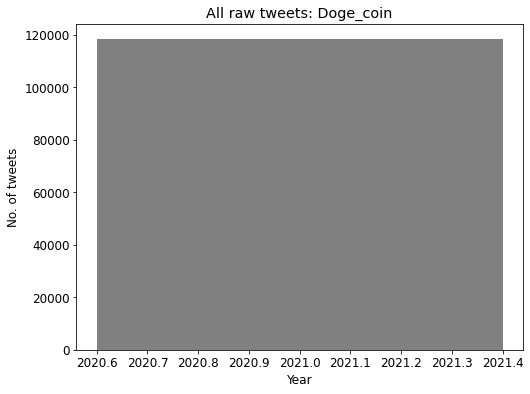

In [ ]:
draw_tweet_barPlot(x, y, "All raw tweets: Doge_coin")

In [ ]:
cleaned_df = pd.read_csv("/content/doge_coin_cleaned_dataset.csv", encoding="utf-8")

In [ ]:
x1 = cleaned_df.year.unique()
y1 = [cleaned_df[cleaned_df.year==year].count().tweet_id for year in x1]
y1

[14304, 21813, 16082, 15707]

In [ ]:
x1

array([2018, 2019, 2020, 2021])

<Figure size 432x288 with 0 Axes>

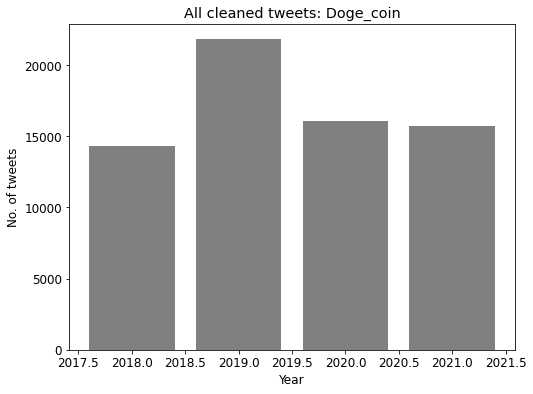

In [ ]:
draw_tweet_barPlot(x1, y1, "All cleaned tweets: Doge_coin")

In [ ]:
tweet_2021_df = cleaned_df[cleaned_df.year == 2021]

In [ ]:
tweet_2021_df.to_csv("doge_tweet_2021.csv",  index=False, encoding='utf-8-sig')

In [ ]:
cleaned_df_2020 = cleaned_df[cleaned_df.year == 2021]
cleaned_df_2020_month = list(cleaned_df_2020.month)
set(cleaned_df_2020_month)

{12.0}

#### Elon Musk tweet Analysis

In [ ]:
# # read all data files of elon musk tweets 
elon_musk_df = read_all_files()

In [ ]:
elon_musk_df.to_csv("elonmusk_raw_dataset.csv", index=False, encoding='utf-8-sig')

In [ ]:
# infile = "/content/elonmusk_raw_dataset.csv"
# elon_musk_df = pd.read_csv(infile, encoding = "utf-8")
# elon_musk_df.head(10)

In [ ]:
elon_musk_df.count()

Unnamed: 0        12436
tweet_id          12436
user_id           12436
user_name         12436
original_tweet    12436
year              12436
month             12436
day               12436
time              12436
source            12436
dtype: int64

In [ ]:
elon_musk_clean_df = clean_tweet(elon_musk_df)

In [ ]:
elon_musk_clean_df.head()

,Unnamed: 0,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet
0,0,1257401142813868032,44196397,Nobody,@Gaelic_Neilson A few hours away!,2020,5,4,20:06:08,Twitter for iPhone,a few hours away!
1,1,1257400536179097601,44196397,Nobody,"@cleantechnica Anyway, we’re just talking abou...",2020,5,4,20:03:43,Twitter for iPhone,"anyway, we’re just talking about 2% here, so n..."
2,2,1257398285716856834,44196397,Nobody,@cleantechnica Weird that EPA would deny this....,2020,5,4,19:54:47,Twitter for iPhone,weird that epa would deny this. we have precis...
3,3,1257207162222215169,44196397,Nobody,@Erdayastronaut @SciGuySpace I hope anything l...,2020,5,4,07:15:19,Twitter for iPhone,i hope anything lands
4,4,1257204578669363200,44196397,Nobody,@NASASpaceflight @TesLatino @Erdayastronaut It...,2020,5,4,07:05:03,Twitter for iPhone,it seems unlikely right now


In [ ]:
elon_musk_clean_df.count() # with duplicates

Unnamed: 0        12436
tweet_id          12436
user_id           12436
user_name         12436
original_tweet    12436
year              12436
month             12436
day               12436
time              12436
source            12436
cleaned_tweet     12436
dtype: int64

In [ ]:
elon_musk_clean_df_1 = remove_duplicates(elon_musk_clean_df)

In [ ]:
elon_musk_clean_df_1.count() # without duplicates

Unnamed: 0        11346
tweet_id          11346
user_id           11346
user_name         11346
original_tweet    11346
year              11346
month             11346
day               11346
time              11346
source            11346
cleaned_tweet     11346
dtype: int64

In [ ]:
elon_musk_clean_df_1.to_csv("elonmusk_cleaned_dataset.csv", index=False, encoding='utf-8-sig')

In [ ]:
x2 = elon_musk_clean_df.year.unique()
y2 = [elon_musk_clean_df[elon_musk_clean_df.year==year].count().tweet_id for year in x2]
y2

[2923, 2590, 2566, 1223, 2046, 1088]

<Figure size 432x288 with 0 Axes>

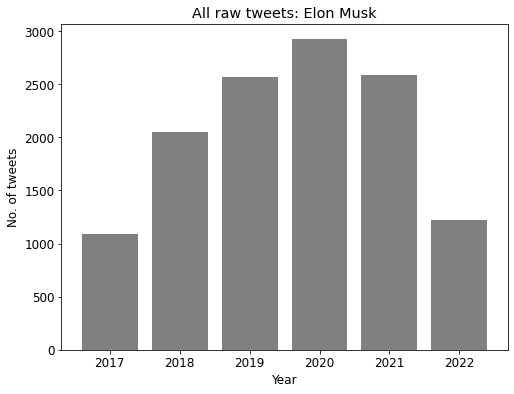

In [ ]:
draw_tweet_barPlot(x2, y2, "All raw tweets: Elon Musk")

In [ ]:
x3 = elon_musk_clean_df_1.year.unique()
y3 = [elon_musk_clean_df_1[elon_musk_clean_df_1.year==year].count().tweet_id for year in x3]
y3

[2669, 2340, 2319, 1086, 1909, 1023]

<Figure size 432x288 with 0 Axes>

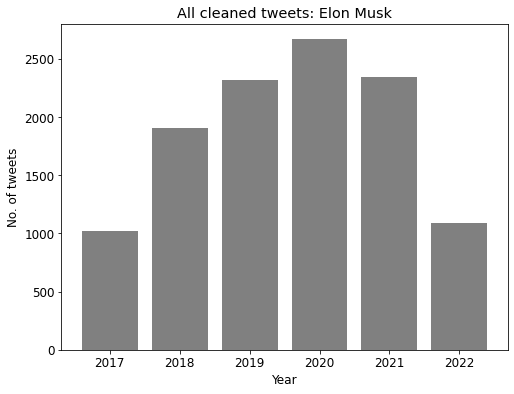

In [ ]:
draw_tweet_barPlot(x3, y3, "All cleaned tweets: Elon Musk")

In [ ]:
elon_musk_clean_df_1 = pd.read_csv("/content/elonmusk_cleaned_dataset.csv", encoding='utf-8-sig')

In [ ]:
elon_musk_doge_tweet = filter_with_coin(elon_musk_clean_df_1, "doge")

In [ ]:
elon_musk_doge_tweet.head(10)

,tweet_id,original_tweet,cleaned_tweeet,year,month,day,time
0,1254039929333649409,@28delayslater @justpaulinelol Dogecoin Mode,dogecoin mode,2020,4,25,13:29:52
1,1284290215561986048,"@izzynobre Excuse me, I only sell Doge!","excuse me, i only sell doge!",2020,7,18,00:53:43
2,1340590280848908288,One word: Doge,one word: doge,2020,12,20,09:30:04
3,1416441034469527556,@AshleyIllusion1 @lexfridman Lil X is hodling ...,lil x is hodling his doge like a champ. litera...,2021,7,17,16:53:53
4,1414774945335361548,"@CGDaveMac Maybe if it sees a Shiba Inu, the c...","maybe if it sees a shiba inu, the car renders ...",2021,7,13,02:33:26
5,1413396249546563586,@MattWallace888 BTC &amp; ETH are pursuing a m...,btc &amp; eth are pursuing a multilayer transa...,2021,7,9,07:15:00
6,1410797794630070278,@RenataKonkoly @thesheetztweetz @rookisaacman ...,but can i pay in doge?,2021,7,2,03:09:40
7,1410529698497630212,"Baby Doge, doo, doo, doo, doo, doo,\nBaby Doge...","baby doge, doo, doo, doo, doo, doo, baby doge,...",2021,7,1,09:24:21
8,1410519466518233089,Release the Doge! https://t.co/9bXCWQLIhu,release the doge!,2021,7,1,08:43:41
9,1454876031232380928,Tuition is in Dogecoin &amp; u get a discount ...,tuition is in dogecoin &amp; u get a discount ...,2021,10,31,18:20:50


In [ ]:
elon_musk_doge_tweet.count()

tweet_id          68
original_tweet    68
cleaned_tweeet    68
year              68
month             68
day               68
time              68
dtype: int64

In [ ]:
elon_musk_doge_tweet.to_csv("elonmusk_doge_tweets.csv", index=False, encoding='utf-8-sig')

In [ ]:
x4 = elon_musk_doge_tweet.year.unique()
y4 = [elon_musk_doge_tweet[elon_musk_doge_tweet.year==year].count().tweet_id for year in x4]
y4

[3, 57, 2, 6]

In [ ]:
x4

array([2020, 2021, 2019, 2022])

<Figure size 432x288 with 0 Axes>

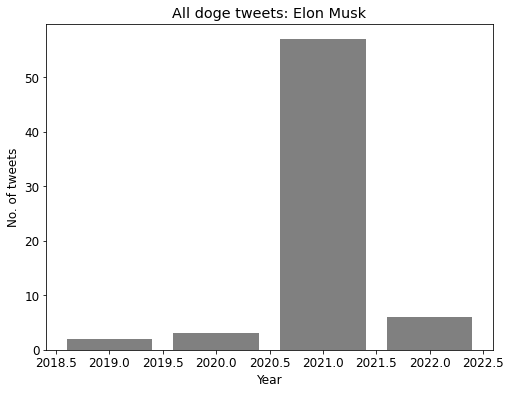

In [ ]:
draw_tweet_barPlot(x4, y4, "All doge tweets: Elon Musk");

In [ ]:
elon_musk_doge_tweet_2021 = elon_musk_doge_tweet[elon_musk_doge_tweet.year == 2021]
elon_musk_doge_tweet_2021_month = list(elon_musk_doge_tweet_2021.month)
set(elon_musk_doge_tweet_2021_month)


{2, 3, 4, 5, 7, 8, 9, 10, 11, 12}

In [ ]:
elon_musk_crypto_tweet = filter_with_coin(elon_musk_clean_df_1, "crypto")

In [ ]:
elon_musk_crypto_tweet.count()

tweet_id          30
original_tweet    30
cleaned_tweeet    30
year              30
month             30
day               30
time              30
dtype: int64

In [ ]:
elon_musk_crypto_tweet.year.unique()

array([2020, 2021, 2019, 2022, 2018])

In [ ]:
elon_musk_coin_tweet = filter_with_coin(elon_musk_clean_df_1, "coin")

In [ ]:
elon_musk_coin_tweet.count()

tweet_id          63
original_tweet    63
cleaned_tweeet    63
year              63
month             63
day               63
time              63
dtype: int64

In [ ]:
elon_musk_coin_tweet.year.unique()

array([2020, 2021, 2019, 2022, 2018, 2017])

### Remove Advert

In [ ]:
ads_users= [617853906, 
 1455167958108420096,
 2232163009,766271113, 
 902975952438865024, 
 1009357757219260032, 
 1119277376108679936, 
 1178811384387290112,
 1242477286135219968,
 1260968439931419904,
 1358572694535610112,
 1361229852347660032,
 1361663132901380096,
 1367118134478589952,
 1371307018020059904,
 1397858781241929984,
 1404473074234370048,
 1429122350398640128,
 1429123988773509888,
 35854162,81330229,
 36923373,2315221933,
 83711683,960308581,
 2232368590,3002152953,
 1349987776939360000,
 1382714991187520000,
 1436726409020410112,
 726437948527398016,   
 828615194771352960,
 1077105297620109952,
 1379169012555330048,
 1379824257014850048,
 1385966258579899904,
 1392566569092489984,           
 473494621,707376110,
 1194432385,1559109584,
 2377034803,2830292157,           
 956072726720121984,
 1268747480105200128,
 1362400674139539968,
 3151017674,
 825748599959126016,
 1319373852472999936,
 105178080,
 1185191116934650112,
 1364560147507539968,
 1383085195994089984, 
 1397020527911259904, 
 1403414815473789952,
 1392056896845139968, 
 1422562191509700096,
 1243445995649679872, 
 1353444426597740032, 
 1359424699529359872,
 1460040648137100032, 
 1583546286, 
 944030034984967936, 
 1282574131599480064, 
 1357763925979389952, 
 1388508398967130112,
 1416792556470419968,
 1405484039310609920, 
 1400567133751360000, 
 1315971815613829888,
 3368158505, 
 3300633006,1532998982,
 921290871177228000,
 13463782,22495289,
 3405393323,
 1438159985326830080,
 1440500074224570112, 
 1391880730368740096,
 226600967,4835448563,
 35550239, 319754792, 
 1154155133447610112,
 308836794,21689830,
 1318207726200229888,
 1281904744169189888,
 1368645172158860032
]

In [ ]:
ads_sources = ['ContentStudio.io',
'Zoho Social',
'ClankApp',
'CoinTweety',
'CryptoTweeter.com',
'dogecoinvalue',
'CoinStats',
'dogecointicker',
'ViralSweep App',
'FS-Poster APP',
'CoinData Registration',
'Cheap Bots, Done Quick!',
'Paper.li',
'twittbot.net',
'The Social Jukebox',
'TiAppTweet',
'Twitter for Advertisers']

In [ ]:
ads_phrases = [
'CHECK OUT OUR',
'CHECK OUT MY',
'CHECK US OUT',
'CHECK IT OUT',
'CHECK THIS OUT',
'SIGN UP',
'FOLLOW THE LINK',
'JOIN THE LINK',
'JOIN HERE',
'THIS LINK',
'MY LINK',
'LINK BELOW',
'DOWNLOUD THE APP',
'INVITE A FRIEND',
'CLAIM YOUR',
'REFERRAL',
'REFERAL',
'INVITATION CODE',
'GIFT TO YOU',
'GIVEAWAY',
'GIVE AWAY',
'GIVING AWAY',
'JOIN OUR',
'REGISTER AT',
'REGISTER ON',
'REGISTER NOW',
'REGISTER HERE',
'DM ME',
' DM ',
' OUR WEBSITE',
'CLICK ON',
'CLICK HERE',
'CLICK THE LINK',
'HELLO GUYS! I HAVE RECEIVED 10 THOUSAND',
'FREE CRYPTO',
'SIGNING UP',
'I AM PARTICIPATING IN',
'BUY HERE',
'TRY US',
'DOGE FOR FREE',
'INVITE FRIENDS',
'JOIN GROUPS',
'LEARN MORE',
'TOP 10 COINS',
'JOIN THE #DOGECOIN FAMILY',
'FOLLOW ME ',
'CHECK THEIR LAST ANNOUNCEMENT',
'BREAKING NEWS! AMAZING!',
'EMPTYWALLETAREALWAYSONTHEMOON',
'ENTER HERE',
'ON UNISWAP',
'BUY IT NOW ON',
'JOIN THE ÐOGECOIN FAMILY',
'AXE IS THE NEXT',
'#UNISWAPGEM',
'FINALLY, I WAS ABLE TO MAKE GREAT PROFITS TOO, I AM VERY GRATEFUL FOR THESE GREAT OPPORTUNITIES',
'JOIN TELEGRAM',
'0X49152DD96BE5A710FACF9A8AB7DE4343A49186D5',
'0X49152DD96BE5A710FACF9A8AB7DE4343A49186D5'
'0XB1EC55536B2C0BA575C4BC8FF96046EEC3027D31',
'0XFAC1F65C835F0E2AF6B77B671BBFBBF9EDBD8AAE',
'DDCFIGVH6GSG3UPHSDWDS37JXUAIJRYRYD',
'0X2CE97416CA28498E6F3DD7306D00EA5784DED071',
'DM3DCGPUGXUDGV7VYTKYMZWBKJVV2DFKKCESJX3HAW6H',
'DDCFIGVH6GSG3UPHSDWDS37JXUAIJRYRYD',
'DFFXRKAPACHNBJOYNBSDKFG9WDGTTQ3BBH',
'D5IMPKYEAE9ZEGPWVHAQZGQ1MES63SZPEG',
'MOBILE APP SOON',
'GOOD NEWS I LIKE THIS',
'WATCH VIDEO AND DECIDE',
'AWARD-WINNING HOLLYWOOD TEAM',
'WITH INSTANT DEPOSIT',
'WE ARE #SNOOPCOINARMY',
'FIND THIS AND OTHERS LIKE IT HERE',
'NO TEAM TOKENS',
'JOIN LIKE RETWEET',
'I JUST CASHED OUT ON MY',
'BUY WHILE THE MARKET IS LOW',
'/ELONETOP. COM',
'KUMAINUOFFICIAL',
'READ BACKWARDS',
'EARN UP TO',
'MULTI-SIG MARKETING WALLET',
'DID YOU MISS BEING IN',
'HAVE AIRDROP',
'THIS IS THE BULL RUN TO ALTSEASON #NPXS',
'TREZOR WALLET',
'AIRDROP',
'TRY ROLLERCOIN',
'BREAKING NEWS!!!!JUST RECEIVED',
'MINING SIMULATOR',
'ONLINE TRADING PLATFORM',
'JOIN AND MAKE MONEY!',
'LITTLERABBITSWAP',
'0X0607396970188B2E524C1CDE4AF1F9A191DEE150',
'DAILY BONUS',
'FREE SPORTS BETTING',
'COINS WITH THE HIGHEST 24-HOUR SOCIAL DOMINANCE',
'JOIN THIS',
'CONTACT ME NOW',
'CURRENT PRICE:',
'DOGECOIN DAILY DISCUSSION',
'DOGECOIN MARKET VALUE',
'JOIN THIS DISCORD',
'SOCIAL ACTIVITY',
'MARKET CAP:', 
'GALAXY SCORE',
'ALTRANK',
'SOCIAL DOMINANCE',
'DOGECOIN PRICE:', 
'HTTPS://T.CO/JJXIYW30RO',
'INVEST WITH JASMINE CRYPTO',
'FIND OUT MORE',
'FUTUREDOGECOINBILLIONAIRESANDMILLIONAIRES',
'PRICE:',
'GIFTBAG_IO',
'YOUR REWARD',
'DOWNLOAD IT',
'BUY:',
'HERE:',
'NEW YOUTUBE VIDEO',
'GET YOUR FREE',
'WILL HELP FUEL THE ROCKET',
'FREE STOCK',
'#AD ',
'BURNDOGE',
'ORAN:',
'FOLLOW MY',
'CRYPTO PUMP ALERT',
'LINK:',
'INVITE LINK',
'VETHOR',
'USE CODE',
'AMAZING CASINO',
'YOU RECIEVE',
'SUPPORT ME',
'PLEASE',
'READ MORE',
'JUST RECEIVED',
'SUBSCRIBE TO',
'CHECK OUT THIS',
'ROUND 2',
'TELEGRAM',
'PRE-SALE',
'FAUCET'
]

#### Method to remove the users and keywords

In [ ]:
def remove_some_ads(df):
  df = df[~df.user_id.isin(ads_users)]
  df = df[~df.source.isin(ads_sources)]

  pattern = '|'.join(ads_phrases)
  df = df[~df.original_tweet.str.upper().str.contains(pattern)]
  return df

In [ ]:
cleaned_df.head()

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet
238,1.356012e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1.0,31.0,22:50:54,Twitter for iPhone,"you can’t stop us, you fucks #dogecoin"
0,1.356022e+18,1.321829e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1.0,31.0,23:28:43,Twitter for Android,let's share it to the entire social network to...
1,1.356022e+18,1.849860e+09,Nobody,"If you really hated socialism, you’d let every...",2021,1.0,31.0,23:28:42,Twitter for iPhone,"if you really hated socialism, you’d let every..."
2,1.356022e+18,1.355761e+18,Nobody,"Like and retweet, if you believe #Dogecoin #i...",2021,1.0,31.0,23:28:35,Twitter for iPhone,"like and retweet, if you believe #dogecoin #in..."
3,1.356022e+18,1.294729e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1.0,31.0,23:28:34,Twitter for Android,#dogecoin is sounding more and more like essen...


In [ ]:
#Removing some ads based on user id and keywords
after_rm_advert_2021_df = remove_some_ads(cleaned_df)

In [ ]:
after_rm_advert_2021_df.count() # 89k

tweet_id          73320
user_id           73320
user_name         73320
original_tweet    73320
year              73320
month             73320
day               73320
time              73320
source            73320
cleaned_tweet     73320
dtype: int64

In [ ]:
after_rm_advert_2021_df.head()

,tweet_id,user_id,user_name,original_tweet,year,month,day,time,source,cleaned_tweet
238,1.356012e+18,3.134341e+09,Nobody,"You can’t stop us, you fucks #dogecoin https:/...",2021,1.0,31.0,22:50:54,Twitter for iPhone,"you can’t stop us, you fucks #dogecoin"
0,1.356022e+18,1.321829e+18,Nobody,https://t.co/EGyJXssO6l\n\nLet's share it to t...,2021,1.0,31.0,23:28:43,Twitter for Android,let's share it to the entire social network to...
1,1.356022e+18,1.849860e+09,Nobody,"If you really hated socialism, you’d let every...",2021,1.0,31.0,23:28:42,Twitter for iPhone,"if you really hated socialism, you’d let every..."
2,1.356022e+18,1.355761e+18,Nobody,"Like and retweet, if you believe #Dogecoin #i...",2021,1.0,31.0,23:28:35,Twitter for iPhone,"like and retweet, if you believe #dogecoin #in..."
3,1.356022e+18,1.294729e+18,Nobody,#dogecoin is sounding more and more like essen...,2021,1.0,31.0,23:28:34,Twitter for Android,#dogecoin is sounding more and more like essen...


#### More cleaning

In [ ]:
def clean_tweets(tweet):
    # Replace multiple spaces with single spaces.
    tweet = re.sub(' +', ' ', tweet)
    # Convert two or more dot's into one.
    tweet = re.sub(r'\.+', ".", tweet)
    # replace "&amp" into &
    tweet = tweet.replace("&amp;", "&")

    return tweet

# loading the data set
# df = pd.read_excel("/content/doge_coin_cleaned_dataset_2020.xlsx")


In [ ]:

after_rm_advert_2021_df['cleaned_tweet'] = after_rm_advert_2021_df['cleaned_tweet'].apply(clean_tweets)

In [ ]:
after_rm_advert_2021_df.to_csv("doge_coin_dataset_2021_orig.csv", index=False, encoding='utf-8-sig')